YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


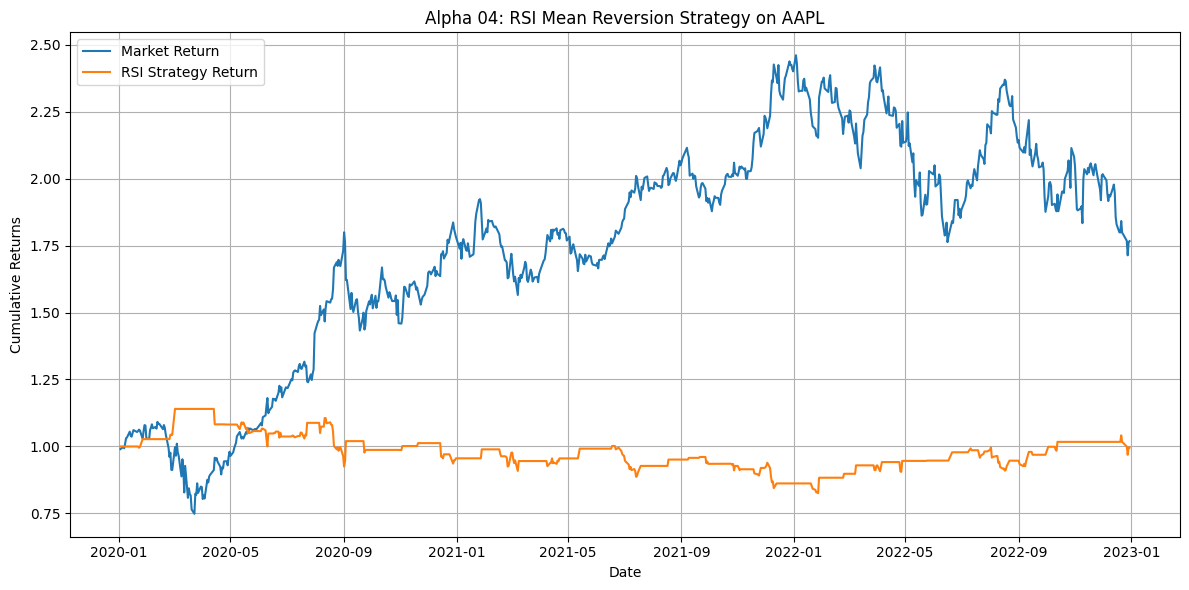

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === RSI Calculation Function ===
def compute_rsi(prices: pd.Series, window: int = 14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# === Alpha Signal ===
def generate_alpha_signal(df: pd.DataFrame):
    df['RSI'] = compute_rsi(df['Close'])

    # Buy if RSI < 30 (oversold), sell if RSI > 70 (overbought)
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    df.loc[df['RSI'] > 70, 'Signal'] = -1

    return df

# === Backtesting (simple cumulative return) ===
def backtest(df: pd.DataFrame):
    df['Daily Return'] = df['Close'].pct_change()
    df['Strategy Return'] = df['Signal'].shift(1) * df['Daily Return']
    df['Cumulative Market Return'] = (1 + df['Daily Return']).cumprod()
    df['Cumulative Strategy Return'] = (1 + df['Strategy Return']).cumprod()

    return df

# === Download & Run ===
ticker = "AAPL"
df = yf.download(ticker, start="2020-01-01", end="2023-01-01")
df = generate_alpha_signal(df)
df = backtest(df)

# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative Market Return'], label='Market Return')
plt.plot(df['Cumulative Strategy Return'], label='RSI Strategy Return')
plt.title(f"Alpha 04: RSI Mean Reversion Strategy on {ticker}")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
